In [7]:
# First of all let's import basic libraries and data to get started
import numpy as np
from numpy  import array
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("Iris.csv") # load data
iris.drop('Id',axis=1,inplace=True) # Id column is redundant as df already assigns index
iris
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:

from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
iris['Species']=number.fit_transform(iris['Species'].astype('str'))

In [23]:
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
X=iris.iloc[:, :-1].values
Y=iris.iloc[:,4].values

In [29]:
# Let's now build a classifier and evaluate accuracy
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
print("train sample size",x_train.shape,type(x_train))
print("test sample size",x_test.shape,type(x_test))

train sample size (105, 4) <class 'numpy.ndarray'>
test sample size (45, 4) <class 'numpy.ndarray'>


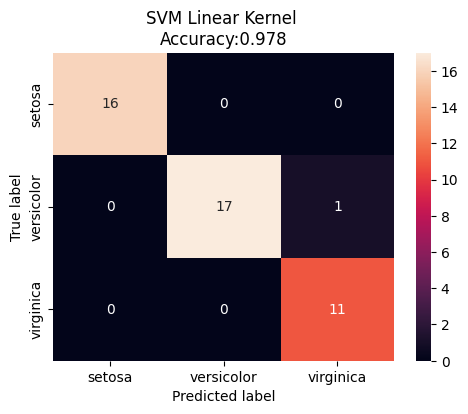

In [31]:
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()